# Ensemble Learning Pipeline

For this notebook, we bring in the features derived from the Graph ML pipeline and the Topic Modeling pipeline. For consistency we will continue to use K-Means for clustering the data. You will note that we used K-Means to cluster the graph results, as well as the topic model results. 

Our goal is to compare the cluster results from the ensemble model with the results from the Graph ML and Topic Model pipelines. We not only want to see an improvement on the groupings of the known fraudsters, but we also hope to have more tightly-knit clusters around them as well. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from platform import python_version

%matplotlib inline

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [25]:
print(python_version())

3.8.3


### Read in Data

In [26]:
#Read in topic features
topics_scaled = pd.read_csv('3_topic_features_scaled.csv', index_col=0)
topics_unscaled = pd.read_csv('3_topic_features.csv', index_col=0)
print(topics_scaled.shape)
print(topics_unscaled.shape)

(14141, 24)
(14141, 24)


In [27]:
print('Scaled Topic Model Features:')
print(topics_scaled.columns.to_list())
print('\n Unscaled Topic Model Features:')
print(topics_unscaled.columns.to_list())

Scaled Topic Model Features:
['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19', 'topic20', 'topic21', 'topic22', 'topic23']

 Unscaled Topic Model Features:
['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19', 'topic20', 'topic21', 'topic22', 'topic23']


In [28]:
#Read in graph features
graph_scaled = pd.read_csv('3_graph_features_scaled.csv', index_col=0)
graph_unscaled = pd.read_csv('3_graph_features.csv', index_col=0)
print(graph_scaled.shape)
print(graph_unscaled.shape)

(14141, 208)
(14141, 208)


In [29]:
print('Sample of Graph Features:')
print(graph_scaled.columns.to_list()[0:30], '...')

Sample of Graph Features:
['in-degree_weighted', 'out-degree_weighted', 'degree-centrality', 'indegree-centrality', 'outdegree-centrality', 'closeness-centrality', 'pagerank', 'hubs', 'authorities', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'] ...


Great! We have the same number of rows. Let's concat the dataframes into a full dataframe

In [30]:
combined_features_scaled = pd.concat([graph_scaled, topics_scaled], axis=1)
combined_features_unscaled = pd.concat([graph_unscaled, topics_unscaled], axis=1)
combined_features_mixed = pd.concat([graph_scaled, topics_unscaled], axis=1)

In [31]:
print(combined_features_scaled.shape)
print(combined_features_unscaled.shape)
print(combined_features_mixed.shape)

(14141, 232)
(14141, 232)
(14141, 232)


In [32]:
combined_features_scaled.head()

,in-degree_weighted,out-degree_weighted,degree-centrality,indegree-centrality,outdegree-centrality,closeness-centrality,pagerank,hubs,authorities,1,...,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23
1.10043390.2@multexinvestornetwork.com,-0.195174,0.095901,-0.214250,-0.499428,-0.091658,-1.270464,-0.165920,-0.009256,-0.021494,0,...,-0.199461,-0.004120,0.057950,-0.158059,-0.354904,-0.231004,-0.254170,-0.130729,-0.231420,-0.387866
jwillia@enron.com,0.906938,-0.108709,-0.108933,0.091767,-0.151396,-1.253648,1.401175,-0.009256,-0.021494,0,...,0.098422,6.400244,-0.228137,-0.150688,-0.190438,-0.248088,-0.251419,-0.125804,-0.223014,-0.546646
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,-0.195174,0.095901,-0.214250,-0.499428,-0.091658,-1.270464,-0.165920,-0.009256,-0.021494,1,...,-0.465974,4.791810,-0.373230,-0.156645,0.321989,-0.261697,-0.253642,-0.129784,-0.229807,-0.627462
brapp@enron.com,0.172197,-0.108709,-0.214250,-0.302363,-0.151396,-1.264859,0.356445,-0.009256,-0.021494,1,...,-0.465974,4.791810,-0.373230,-0.156645,0.321989,-0.261697,-0.253642,-0.129784,-0.229807,-0.627462
101qi@msn.com,-0.195174,0.095901,-0.214250,-0.499428,-0.091658,-1.270464,-0.165920,-0.009256,-0.021494,0,...,0.705141,-0.142907,-0.367938,-0.131757,2.497690,-0.248617,-0.244350,-0.113157,-0.201424,-0.623781


## I. KMeans Clustering Scaled

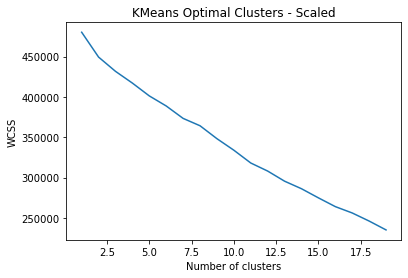

In [33]:
#Find optimal clusters (**** This may take a while ****): 
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(combined_features_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title('KMeans Optimal Clusters - Scaled')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
#Select & construct the optimal model. Note that we don't have any good "elbows" to use, so we will choose 13 clusters: 
kmeans = KMeans(n_clusters =13, init = 'k-means++', random_state = 42)
#Create the dependent variable, which are the clusters KMeans assigns to each person
y_kmeans = kmeans.fit_predict(combined_features_scaled)

#### Reduce Dimensions with PCA

In [35]:
pca = PCA(n_components=2)

#Fit the model to our data: 
pca.fit(combined_features_scaled)

#Transform the model data: 
x_pca = pca.transform(combined_features_scaled)

print(combined_features_scaled.shape)
print('\n')
print(x_pca.shape)

(14141, 232)


(14141, 2)


In [36]:
#Add principal components to a dataframe we can use to plot individual points on our scatterplot
df_pca = pd.DataFrame(index=combined_features_scaled.index)
df_pca['pca1'] = x_pca[:,0]
df_pca['pca2'] = x_pca[:,1]
df_pca['allclusters_scaled'] = y_kmeans
df_pca.head()

,pca1,pca2,allclusters_scaled
1.10043390.2@multexinvestornetwork.com,-0.647188,-0.541311,7
jwillia@enron.com,0.632679,0.767445,2
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,-0.757460,0.581146,11
brapp@enron.com,-0.385191,0.587104,11
101qi@msn.com,-0.602144,-0.101957,4


### Visualize & Investigate our Results

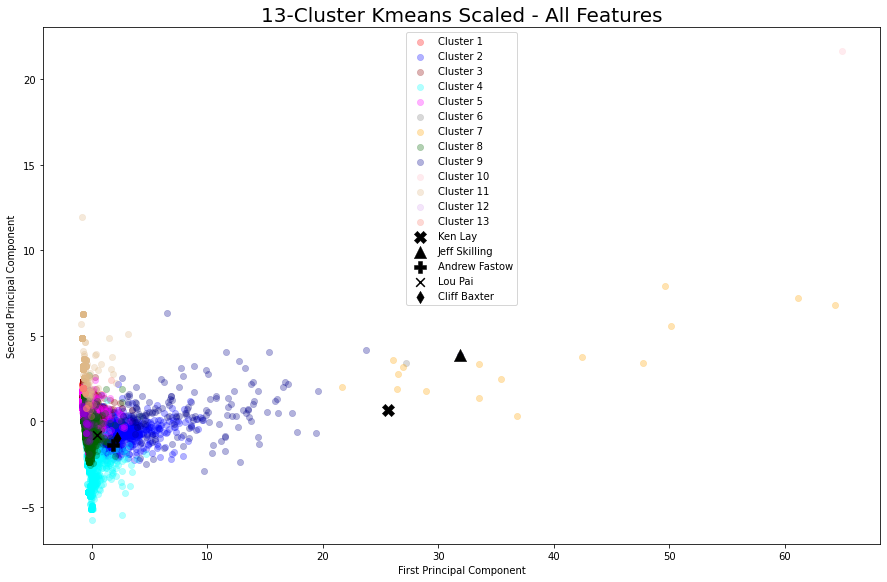

In [37]:
#Plot the cluster data, coloring the plot by cluster assignment: #<-------EDIT THIS 
plt.figure(figsize = (15,9.5))
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1], s = 40, alpha=.3, linewidths=.5, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1], s = 40, alpha=.3, linewidths=.5, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1], s = 40, alpha=.3, linewidths=.5, c = 'darkred', label = 'Cluster 3')
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1], s = 40, alpha=.3, linewidths=.5, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_pca[y_kmeans==4,0],x_pca[y_kmeans==4,1], s = 40, alpha=.3, linewidths=.5, c = 'magenta', label = 'Cluster 5')
plt.scatter(x_pca[y_kmeans==5,0],x_pca[y_kmeans==5,1], s = 40, alpha=.3, linewidths=.5, c = 'gray', label = 'Cluster 6')
plt.scatter(x_pca[y_kmeans==6,0],x_pca[y_kmeans==6,1], s = 40, alpha=.3, linewidths=.5, c = 'orange', label = 'Cluster 7')
plt.scatter(x_pca[y_kmeans==7,0],x_pca[y_kmeans==7,1], s = 40, alpha=.3, linewidths=.5, c = 'darkgreen', label = 'Cluster 8')
plt.scatter(x_pca[y_kmeans==8,0],x_pca[y_kmeans==8,1], s = 40, alpha=.3, linewidths=.5, c = 'darkblue', label = 'Cluster 9')
plt.scatter(x_pca[y_kmeans==9,0],x_pca[y_kmeans==9,1], s = 40, alpha=.3, linewidths=.5, c = 'pink', label = 'Cluster 10')
plt.scatter(x_pca[y_kmeans==10,0],x_pca[y_kmeans==10,1], s = 40, alpha=.3, linewidths=.5, c = 'burlywood', label = 'Cluster 11')
plt.scatter(x_pca[y_kmeans==11,0],x_pca[y_kmeans==11,1], s = 40, alpha=.1, linewidths=.5, c = 'darkviolet', label = 'Cluster 12')
plt.scatter(x_pca[y_kmeans==12,0],x_pca[y_kmeans==12,1], s = 40, alpha=.3, linewidths=.5, c = 'salmon', label = 'Cluster 13')
#plt.scatter(x_pca[y_kmeans==13,0],x_pca[y_kmeans==13,1], s = 40, alpha=.3, linewidths=.5, c = 'mediumvioletred', label = 'Cluster 14')
#plt.scatter(x_pca[y_kmeans==14,0],x_pca[y_kmeans==14,1], s = 40, alpha=.3, linewidths=.5, c = 'orchid', label = 'Cluster 15')
#plt.scatter(x_pca[y_kmeans==15,0],x_pca[y_kmeans==15,1], s = 40, alpha=.3, linewidths=.5, c = 'cadetblue', label = 'Cluster 16')
#plt.scatter(x_pca[y_kmeans==16,0],x_pca[y_kmeans==16,1], s = 40, alpha=.3, linewidths=.5, c = 'palegreen', label = 'Cluster 17')
#plt.scatter(x_pca[y_kmeans==17,0],x_pca[y_kmeans==17,1], s = 40, alpha=.3, linewidths=.5, c = 'lightgray', label = 'Cluster 18')
#plt.scatter(x_pca[y_kmeans==18,0],x_pca[y_kmeans==18,1], s = 40, alpha=.3, linewidths=.5, c = 'lightseagreen', label = 'Cluster 19')
#plt.scatter(x_pca[y_kmeans==19,0],x_pca[y_kmeans==19,1], s = 40, alpha=.3, linewidths=.5, c = 'darkolivegreen', label = 'Cluster 20')
#plt.scatter(x_pca[y_kmeans==20,0],x_pca[y_kmeans==20,1], s = 40, alpha=.3, linewidths=.5, c = 'violet', label = 'Cluster 21')

#Plot the points where our known fraudsters are located: 
plt.scatter(df_pca.loc['kenneth.lay@enron.com'][0], df_pca.loc['kenneth.lay@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'X', label = 'Ken Lay')
plt.scatter(df_pca.loc['jeff.skilling@enron.com'][0], df_pca.loc['jeff.skilling@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = '^', label = 'Jeff Skilling')
plt.scatter(df_pca.loc['andrew.fastow@enron.com'][0], df_pca.loc['andrew.fastow@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'P', label = 'Andrew Fastow')
plt.scatter(df_pca.loc['lou.pai@enron.com'][0], df_pca.loc['lou.pai@enron.com'][1], s = 75, linewidths=.5, c = 'black', marker = 'x', label = 'Lou Pai')
plt.scatter(df_pca.loc['cliff.baxter@enron.com'][0], df_pca.loc['cliff.baxter@enron.com'][1], s = 75, linewidths=.5, c = 'black', marker = 'd', label = 'Cliff Baxter')

#plt.scatter(ctr_pca20[:, 0], ctr_pca20[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('13-Cluster Kmeans Scaled - All Features', fontsize=20)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

In [38]:
ken_skmean1 = int(df_pca.loc['kenneth.lay@enron.com']['allclusters_scaled'])
jeff_skmean1 = int(df_pca.loc['jeff.skilling@enron.com']['allclusters_scaled'])
andy_skmean1 = int(df_pca.loc['andrew.fastow@enron.com']['allclusters_scaled'])
lou_skmean1 = int(df_pca.loc['lou.pai@enron.com']['allclusters_scaled'])
cliff_skmean1 = int(df_pca.loc['cliff.baxter@enron.com']['allclusters_scaled'])

print('13-Cluster KMeans - Scaled')
print('---------------------------------')
print('Ken:  ' + str(ken_skmean1))
print('Jeff:  ' + str(jeff_skmean1))
print('Andy:  ' + str(andy_skmean1))
print('Lou:  ' + str(lou_skmean1))
print('Cliff:  ' + str(cliff_skmean1))
print('\n')

#How many people are in each of these subsets? 
print("Number of people in each group:")
print('------------------------------')
print("Ken:  ", len(df_pca[df_pca['allclusters_scaled']==ken_skmean1]))
print("Jeff:  ", len(df_pca[df_pca['allclusters_scaled']==jeff_skmean1]))
print("Andy, Lou & Cliff:  ", len(df_pca[df_pca['allclusters_scaled']==andy_skmean1]))

print("Everyone Else:  ", len(df_pca) - len(df_pca[df_pca['allclusters_scaled']==ken_skmean1]) - len(df_pca[df_pca['allclusters_scaled']==jeff_skmean1]) - len(df_pca[df_pca['allclusters_scaled']==andy_skmean1]))

13-Cluster KMeans - Scaled
---------------------------------
Ken:  6
Jeff:  8
Andy:  1
Lou:  1
Cliff:  1


Number of people in each group:
------------------------------
Ken:   17
Jeff:   149
Andy, Lou & Cliff:   4834
Everyone Else:   9141


In [39]:
#Who is in Ken's Cluster? 
ken_cluster = df_pca[df_pca['allclusters_scaled']==ken_skmean1]
ken_cluster

,pca1,pca2,allclusters_scaled
john.lavorato@enron.com,28.892340,1.802292,6
louise.kitchen@enron.com,33.485501,1.396055,6
sally.beck@enron.com,42.413349,3.773184,6
richard.shapiro@enron.com,36.768812,0.343507,6
jeff.dasovich@enron.com,64.380422,6.827691,6
chris.germany@enron.com,26.060324,3.610488,6
kenneth.lay@enron.com,25.614178,0.659278,6
tana.jones@enron.com,61.124789,7.212510,6
kay.mann@enron.com,49.582226,7.914538,6
daren.farmer@enron.com,26.414064,1.924924,6


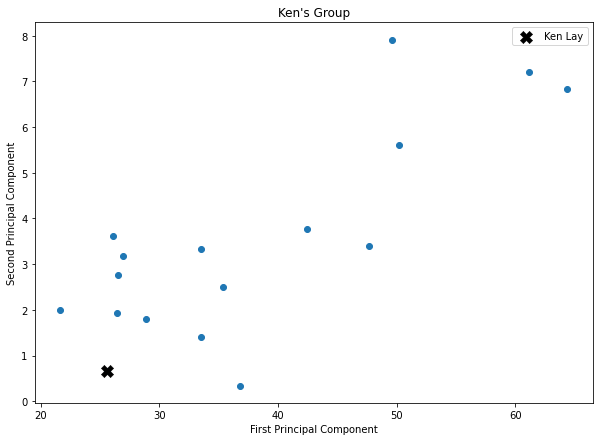

In [61]:
#Plot Ken's Cluster: 
plt.figure(figsize = (10,7))
plt.scatter(ken_cluster['pca1'], ken_cluster['pca2'])
plt.scatter(ken_cluster.loc['kenneth.lay@enron.com'][0], ken_cluster.loc['kenneth.lay@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'X', label = 'Ken Lay')
#plt.scatter(cluster4.loc['jeff.skilling@enron.com'][0], cluster4.loc['jeff.skilling@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = '^', label = 'Jeff Skilling')

plt.title('Ken\'s Group')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()

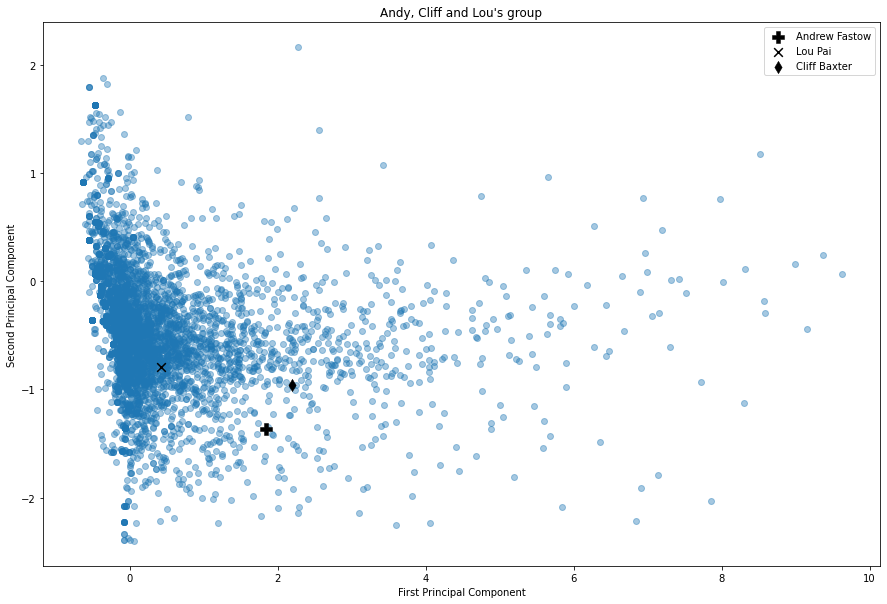

In [59]:
#Plot the cluster that contains Andy, Cliff and Lou:  
cluster2 = df_pca[df_pca['allclusters_scaled']==andy_skmean1]

plt.figure(figsize = (15,10))
plt.scatter(cluster2['pca1'], cluster2['pca2'], alpha = .4)

plt.scatter(cluster2.loc['andrew.fastow@enron.com'][0], cluster2.loc['andrew.fastow@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'P', label = 'Andrew Fastow')
plt.scatter(cluster2.loc['lou.pai@enron.com'][0], cluster2.loc['lou.pai@enron.com'][1], s = 75, linewidths=.5, c = 'black', marker = 'x', label = 'Lou Pai')
plt.scatter(cluster2.loc['cliff.baxter@enron.com'][0], cluster2.loc['cliff.baxter@enron.com'][1], s = 75, linewidths=.5, c = 'black', marker = 'd', label = 'Cliff Baxter')

plt.title('Andy, Cliff and Lou\'s group')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()

# II. Kmeans - combined clustering mixed

Now we observe the effects of normalization and scaling our features sets has on our results. It is possible that this has impacted the accuracy of our model and we would like to see if we get better results by not applying feature scaling to the topic data and graph data

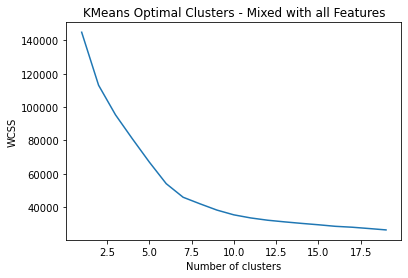

In [42]:
#Find optimal clusters: 
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(combined_features_mixed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('KMeans Optimal Clusters - Mixed with all Features')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Unlike the previous clustering evaluation, we see a clear bend at 6 and 10. We will select one of these for our cluster assignment and see how the model does

In [43]:
#We will choose the 10-cluster model: 
kmeans3 = KMeans(n_clusters =10, init = 'k-means++', random_state = 42)
#Create the dependent variable, which are the clusters KMeans assigns to each person
y_kmeans3 = kmeans3.fit_predict(combined_features_mixed)

#### Reduce Dimensions with PCA

In [44]:
pca3 = PCA(n_components=2)

#Fit the model to our data: 
pca3.fit(combined_features_mixed)

#Transform the model data: 
x_pca3 = pca3.transform(combined_features_mixed)

print(combined_features_mixed.shape)
print('\n')
print(x_pca3.shape)

(14141, 232)


(14141, 2)


In [45]:
#Add principal components to a dataframe we can use to plot individual points on our scatterplot
df_pca3 = pd.DataFrame(index=combined_features_mixed.index)
df_pca3['pca1'] = x_pca3[:,0]
df_pca3['pca2'] = x_pca3[:,1]
df_pca3['clusters_mixed'] = y_kmeans3
df_pca3.head()

,pca1,pca2,clusters_mixed
1.10043390.2@multexinvestornetwork.com,-0.625206,-0.076035,0
jwillia@enron.com,0.737158,0.680479,0
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,-0.625574,-0.075521,0
brapp@enron.com,-0.250505,0.201759,0
101qi@msn.com,-0.625201,-0.074904,0


#### Visualize

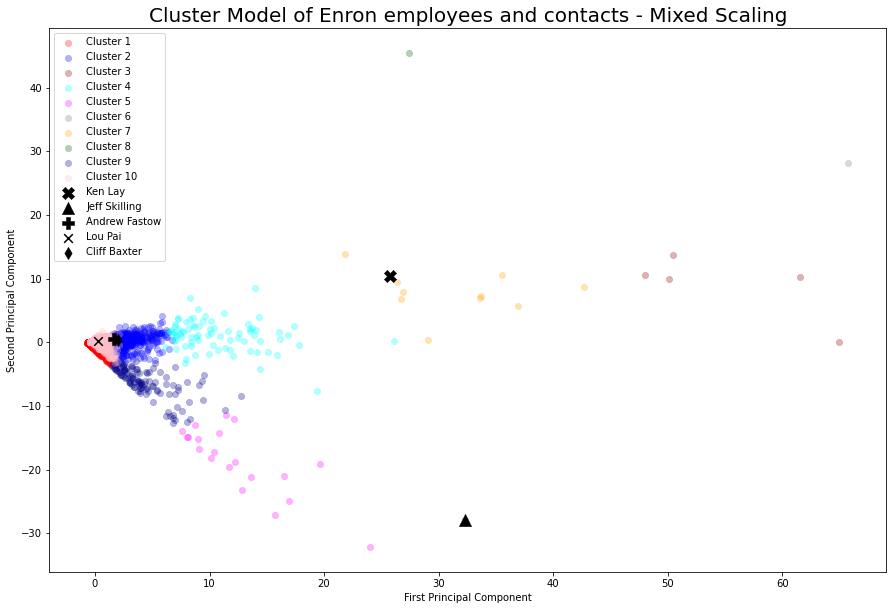

In [57]:
#Plot the cluster data, coloring the plot by cluster assignment: 
plt.figure(figsize = (15,10))
plt.scatter(x_pca3[y_kmeans3==0,0],x_pca3[y_kmeans3==0,1], s = 40, alpha=.3, linewidths=.5, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca3[y_kmeans3==1,0],x_pca3[y_kmeans3==1,1], s = 40, alpha=.3, linewidths=.5, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca3[y_kmeans3==2,0],x_pca3[y_kmeans3==2,1], s = 40, alpha=.3, linewidths=.5, c = 'darkred', label = 'Cluster 3')
plt.scatter(x_pca3[y_kmeans3==3,0],x_pca3[y_kmeans3==3,1], s = 40, alpha=.3, linewidths=.5, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_pca3[y_kmeans3==4,0],x_pca3[y_kmeans3==4,1], s = 40, alpha=.3, linewidths=.5, c = 'magenta', label = 'Cluster 5')
plt.scatter(x_pca3[y_kmeans3==5,0],x_pca3[y_kmeans3==5,1], s = 40, alpha=.3, linewidths=.5, c = 'gray', label = 'Cluster 6')
plt.scatter(x_pca3[y_kmeans3==6,0],x_pca3[y_kmeans3==6,1], s = 40, alpha=.3, linewidths=.5, c = 'orange', label = 'Cluster 7')
plt.scatter(x_pca3[y_kmeans3==7,0],x_pca3[y_kmeans3==7,1], s = 40, alpha=.3, linewidths=.5, c = 'darkgreen', label = 'Cluster 8')
plt.scatter(x_pca3[y_kmeans3==8,0],x_pca3[y_kmeans3==8,1], s = 40, alpha=.3, linewidths=.5, c = 'darkblue', label = 'Cluster 9')
plt.scatter(x_pca3[y_kmeans3==9,0],x_pca3[y_kmeans3==9,1], s = 40, alpha=.3, linewidths=.5, c = 'pink', label = 'Cluster 10')

#Plot the points where our known fraudsters are located: 
plt.scatter(df_pca3.loc['kenneth.lay@enron.com'][0], df_pca3.loc['kenneth.lay@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'X', label = 'Ken Lay')
plt.scatter(df_pca3.loc['jeff.skilling@enron.com'][0], df_pca3.loc['jeff.skilling@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = '^', label = 'Jeff Skilling')
plt.scatter(df_pca3.loc['andrew.fastow@enron.com'][0], df_pca3.loc['andrew.fastow@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'P', label = 'Andrew Fastow')
plt.scatter(df_pca3.loc['lou.pai@enron.com'][0], df_pca3.loc['lou.pai@enron.com'][1], s = 75, linewidths=.5, c = 'black', marker = 'x', label = 'Lou Pai')
plt.scatter(df_pca3.loc['cliff.baxter@enron.com'][0], df_pca3.loc['cliff.baxter@enron.com'][1], s = 75, linewidths=.5, c = 'black', marker = 'd', label = 'Cliff Baxter')

#plt.scatter(ctr_pca20[:, 0], ctr_pca20[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Model of Enron employees and contacts - Mixed Scaling', fontsize=20)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

In [47]:
ken_skmean2 = int(df_pca3.loc['kenneth.lay@enron.com']['clusters_mixed'])
jeff_skmean2 = int(df_pca3.loc['jeff.skilling@enron.com']['clusters_mixed'])
andy_skmean2 = int(df_pca3.loc['andrew.fastow@enron.com']['clusters_mixed'])
lou_skmean2 = int(df_pca3.loc['lou.pai@enron.com']['clusters_mixed'])
cliff_skmean2 = int(df_pca3.loc['cliff.baxter@enron.com']['clusters_mixed'])

print('10-Cluster KMeans - Mixed Feature Scaling')
print('-------------------------------------------')
print('Ken:  ' + str(ken_skmean2))
print('Jeff:  ' + str(jeff_skmean2))
print('Andy:  ' + str(andy_skmean2))
print('Lou:  ' + str(lou_skmean2))
print('Cliff:  ' + str(cliff_skmean2))

print('\n')

#How many people are in each of these subsets? 
print("Cluster Size:")
print('------------')
print("Ken:  ", len(df_pca3[df_pca3['clusters_mixed']==ken_skmean2]))
print("Jeff:  ", len(df_pca3[df_pca3['clusters_mixed']==jeff_skmean2]))
print("Andy & Cliff: ", len(df_pca3[df_pca3['clusters_mixed']==andy_skmean2]))
print("Lou:  ", len(df_pca3[df_pca3['clusters_mixed']==lou_skmean2]))

print("Everyone Else:  ", len(df_pca3) - len(df_pca3[df_pca3['clusters_mixed']==ken_skmean2]) - len(df_pca3[df_pca3['clusters_mixed']==jeff_skmean2]) - len(df_pca3[df_pca3['clusters_mixed']==andy_skmean2])- len(df_pca3[df_pca3['clusters_mixed']==lou_skmean2]))

10-Cluster KMeans - Mixed Feature Scaling
-------------------------------------------
Ken:  6
Jeff:  4
Andy:  1
Lou:  9
Cliff:  1


Cluster Size:
------------
Ken:   11
Jeff:   21
Andy & Cliff:  751
Lou:   7951
Everyone Else:   5407


In [48]:
#Who is in Ken's cluster? 
cluster2 = df_pca3[df_pca3['clusters_mixed']==ken_skmean2]
cluster2

,pca1,pca2,clusters_mixed
john.lavorato@enron.com,29.034638,0.378513,6
louise.kitchen@enron.com,33.646913,7.019495,6
sally.beck@enron.com,42.712890,8.623225,6
richard.shapiro@enron.com,36.923773,5.765655,6
kenneth.lay@enron.com,25.742275,10.383715,6
daren.farmer@enron.com,26.400245,9.490593,6
benjamin.rogers@enron.com,26.688197,6.763648,6
kate.symes@enron.com,26.914696,7.952026,6
mark.taylor@enron.com,35.561450,10.533310,6
gerald.nemec@enron.com,33.725951,7.322791,6


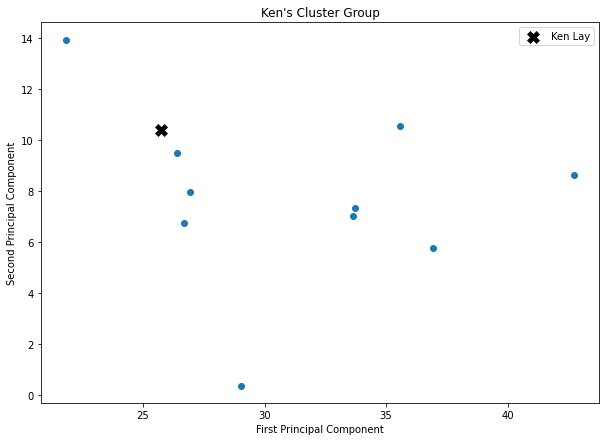

In [49]:
#Plot cluster 2: 
plt.figure(figsize = (10,7))
plt.scatter(cluster2['pca1'], cluster2['pca2'])
plt.scatter(cluster2.loc['kenneth.lay@enron.com'][0], cluster2.loc['kenneth.lay@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'X', label = 'Ken Lay')

plt.title("Ken's Cluster Group")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()

In [50]:
#Who is in Jeff's cluster? 
cluster7 = df_pca3[df_pca3['clusters_mixed']==jeff_skmean2]
cluster7

,pca1,pca2,clusters_mixed
david.forster@enron.com,19.615829,-19.088643,4
jeff.skilling@enron.com,32.292295,-27.930077,4
janel.guerrero@enron.com,11.458875,-11.376184,4
outlook.team@enron.com,13.582698,-21.155502,4
araceli.romero@enron.com,10.352047,-17.142669,4
rosalee.fleming@enron.com,23.984867,-32.141784,4
janette.elbertson@enron.com,12.125910,-11.987403,4
bhanlon@isda.org,8.120261,-14.881256,4
cheryl.johnson@enron.com,12.187636,-18.836133,4
rhonda.denton@enron.com,10.817334,-14.222048,4


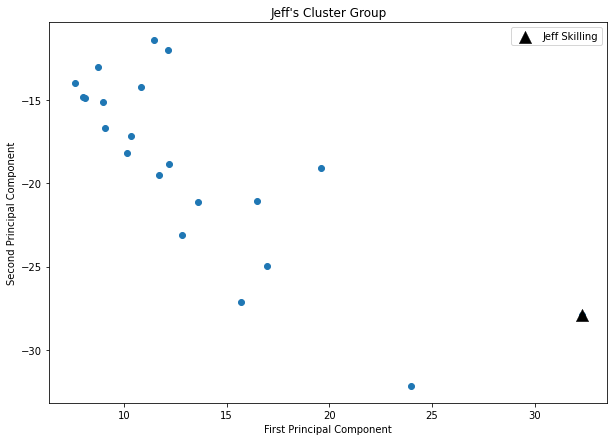

In [51]:
#Plot Jeff's cluster: 
plt.figure(figsize = (10,7))
plt.scatter(cluster7['pca1'], cluster7['pca2'])
plt.scatter(cluster7.loc['jeff.skilling@enron.com'][0], cluster7.loc['jeff.skilling@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = '^', label = 'Jeff Skilling')

plt.title("Jeff's Cluster Group")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()

## III. Comparison of Model Results

In [52]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [53]:
import seaborn as sns

In [54]:
# Create a dataframe and a visualization to house our results:
model_results = {'names':['Ken', 'Jeff', 'Andy', 'Lou', 'Cliff', 'Everyone Else'],
                'graph_cust_community': [34,489,3,61,2,13549],
                'graph_orig_community': [261,261,1157,261,261,12200],
                'graph_full_scaled': [12,15,382,7936,382,5413],
                'graph_full_noscale': [6,239,4621,4621,4621,33],
                'topic_scaled': [1014,1263,1014,345,345,10159],
                'topic_noscale': [760,1011,760,828,609,10172],
                'ensemble_scaled':[17,147,1611,1611,1611,9141],
                'ensemble_mixscale': [21,11,375,7981,375,5407]}
model_results

{'names': ['Ken', 'Jeff', 'Andy', 'Lou', 'Cliff', 'Everyone Else'],
 'graph_cust_community': [34, 489, 3, 61, 2, 13549],
 'graph_orig_community': [261, 261, 1157, 261, 261, 12200],
 'graph_full_scaled': [12, 15, 382, 7936, 382, 5413],
 'graph_full_noscale': [6, 239, 4621, 4621, 4621, 33],
 'topic_scaled': [1014, 1263, 1014, 345, 345, 10159],
 'topic_noscale': [760, 1011, 760, 828, 609, 10172],
 'ensemble_scaled': [17, 147, 1611, 1611, 1611, 9141],
 'ensemble_mixscale': [21, 11, 375, 7981, 375, 5407]}

In [55]:
df = pd.DataFrame(model_results)
df=df.set_index('names')

Plot the results using a diverging color scale. Note that color saturation represents extreme values. Dark blue represents smaller community sizes while dark red represents larger community sizes. The lighter colors represent average-size clusters. 

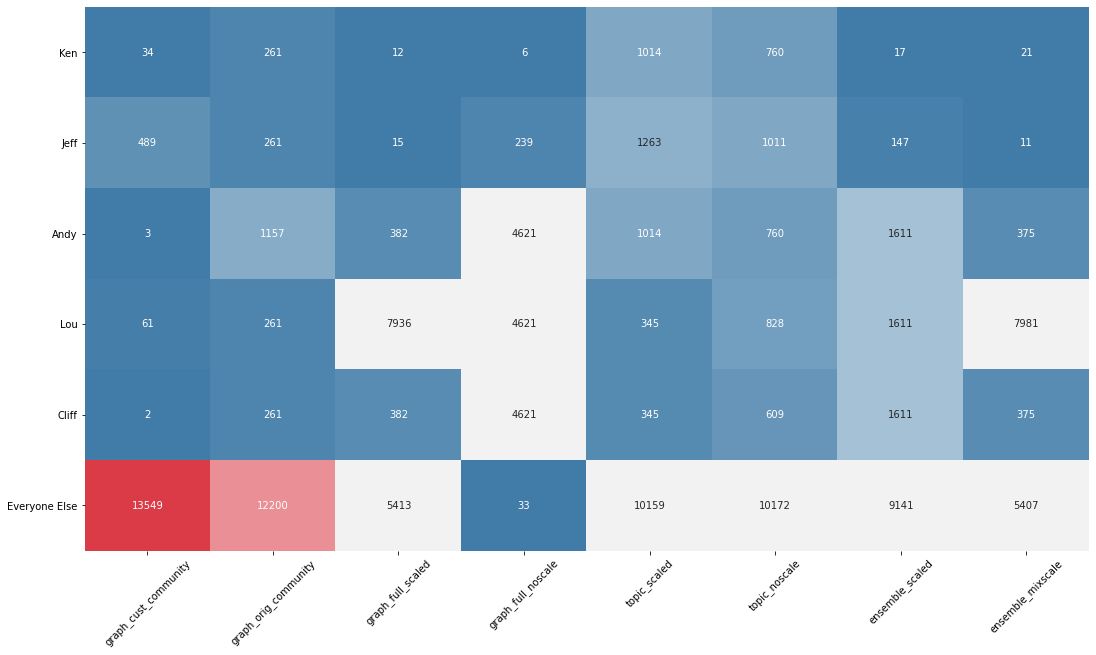

In [56]:
plt.figure(figsize=(18,10))
cmap = sns.diverging_palette(240,10, sep=150, n=256, as_cmap=True)
heat_map = sns.heatmap(df, annot=True, cmap=cmap, fmt='g', cbar=False, ax=None)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.ylabel("")
plt.show()

## IV. Next Steps

It doesn't end here, friends! There is always more that we could try. Here are a few ideas. Please feel free to try these methods out on this dataset and add to our knowledge base! We all grow from sharing our experiences and insights. 

    1.) Deep Learning techniques for Topic Modeling, such as LSTM. 
    
    2.) Matrix factorization techniques for topic modeling.
    
    3.) ML-based Entity Resolution. In the data cleanup phases, we had to do some manual cleanup of the email addresses. Using Dedupe for Active learning techniques and also looking to graph-enabled entity resolution would be a great bonus for improving model results
    
    4.) Hierarchical clustering techniques as compared to K-Means. 
    
I hope you enjoyed this Machine Learning Tutorial! Please feel free to reach out to disten_olivia@bah.com for further collaboration and exploration into this topic. Thanks! 
